In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [74]:
df_data = pd.read_csv("../../data/external/paper_dic24/Prova_test_facility/Detail_C1.5.csv", skiprows=3)
df_t_amb = pd.read_csv("../../data/external/paper_dic24/Prova_test_facility/Detail_Sonda_Cassone.csv", skiprows=3)

In [75]:
columns_to_drop = ['Description', 'Step', 'Cycle', 'Loop']

In [76]:
df_data = df_data.drop(columns=columns_to_drop)

In [77]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
0,2024/10/28 16:01:34,10,3.6957,10.0229,0.0000,0.0000,37.041515,1.000000e-07,21.1822
1,2024/10/28 16:01:35,1010,3.7045,10.0183,0.0028,0.0028,37.112541,1.040000e-05,21.2535
2,2024/10/28 16:01:36,2010,3.7053,10.0195,0.0056,0.0056,37.124693,2.070000e-05,21.3129
3,2024/10/28 16:01:37,3010,3.7061,10.0210,0.0084,0.0084,37.139430,3.100000e-05,21.1884
4,2024/10/28 16:01:38,4010,3.7073,10.0206,0.0112,0.0112,37.148979,4.130000e-05,21.1883
...,...,...,...,...,...,...,...,...,...
90493,2024/10/29 17:09:45,90490860,3.9943,0.3129,2.1019,9.4572,1.249620,8.336300e-03,21.6960
90494,2024/10/29 17:09:46,90491860,3.9943,0.3038,2.1020,9.4573,1.213399,8.336600e-03,21.6748
90495,2024/10/29 17:09:47,90492860,3.9940,0.3242,2.1021,9.4574,1.294813,8.337000e-03,21.6812
90496,2024/10/29 17:09:48,90493860,3.9940,0.3151,2.1022,9.4575,1.258595,8.337300e-03,21.6546


In [78]:
df_t_amb = df_t_amb[['TEST TIME', 'DWell Time(ms)', 'T6a']]

In [79]:
df_t_amb

,TEST TIME,DWell Time(ms),T6a
0,2024/10/28 16:01:51,10,21.3768
1,2024/10/28 16:01:52,1010,21.3631
2,2024/10/28 16:01:53,2010,21.3664
3,2024/10/28 16:01:54,3010,21.2692
4,2024/10/28 16:01:55,4010,21.3226
...,...,...,...
149298,2024/10/30 09:30:09,149298010,20.9004
149299,2024/10/30 09:30:10,149299010,20.8092
149300,2024/10/30 09:30:11,149300010,20.8517
149301,2024/10/30 09:30:12,149301010,20.7950


In [80]:
# Allineo T_amb e dataset perché il dataset inizia prima di t_amb
df_data[df_data['TEST TIME'] == df_t_amb['TEST TIME'][0]]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
17,2024/10/28 16:01:51,17010,3.715,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097


In [81]:
df_data.iloc[15:19]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
15,2024/10/28 16:01:49,15010,3.7140,10.0197,0.0418,0.0418,37.212921,0.000155,21.2492
16,2024/10/28 16:01:50,16010,3.7145,10.0158,0.0446,0.0446,37.204251,0.000165,21.1974
17,2024/10/28 16:01:51,17010,3.7150,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097
18,2024/10/28 16:01:52,18010,3.7155,10.0161,0.0501,0.0501,37.214712,0.000186,21.2296


In [82]:
df_data['DWell Time(ms)'] = df_data['DWell Time(ms)'] - 17000
df_data = df_data[17:]

In [83]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
17,2024/10/28 16:01:51,10,3.7150,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097
18,2024/10/28 16:01:52,1010,3.7155,10.0161,0.0501,0.0501,37.214712,0.000186,21.2296
19,2024/10/28 16:01:53,2010,3.7161,10.0220,0.0529,0.0529,37.242262,0.000196,21.1824
20,2024/10/28 16:01:54,3010,3.7165,10.0172,0.0557,0.0557,37.228419,0.000207,21.1700
21,2024/10/28 16:01:55,4010,3.7170,10.0165,0.0585,0.0585,37.231728,0.000217,21.2103
...,...,...,...,...,...,...,...,...,...
90493,2024/10/29 17:09:45,90473860,3.9943,0.3129,2.1019,9.4572,1.249620,0.008336,21.6960
90494,2024/10/29 17:09:46,90474860,3.9943,0.3038,2.1020,9.4573,1.213399,0.008337,21.6748
90495,2024/10/29 17:09:47,90475860,3.9940,0.3242,2.1021,9.4574,1.294813,0.008337,21.6812
90496,2024/10/29 17:09:48,90476860,3.9940,0.3151,2.1022,9.4575,1.258595,0.008337,21.6546


In [84]:
df_t_amb.tail()

,TEST TIME,DWell Time(ms),T6a
149298,2024/10/30 09:30:09,149298010,20.9004
149299,2024/10/30 09:30:10,149299010,20.8092
149300,2024/10/30 09:30:11,149300010,20.8517
149301,2024/10/30 09:30:12,149301010,20.7950
149302,2024/10/30 09:30:12,149301140,20.7950


In [85]:
df_data.tail()

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
90493,2024/10/29 17:09:45,90473860,3.9943,0.3129,2.1019,9.4572,1.249620,0.008336,21.6960
90494,2024/10/29 17:09:46,90474860,3.9943,0.3038,2.1020,9.4573,1.213399,0.008337,21.6748
90495,2024/10/29 17:09:47,90475860,3.9940,0.3242,2.1021,9.4574,1.294813,0.008337,21.6812
90496,2024/10/29 17:09:48,90476860,3.9940,0.3151,2.1022,9.4575,1.258595,0.008337,21.6546
90497,2024/10/29 17:09:49,90477860,3.9944,0.3106,2.1023,9.4576,1.240605,0.008338,21.7193


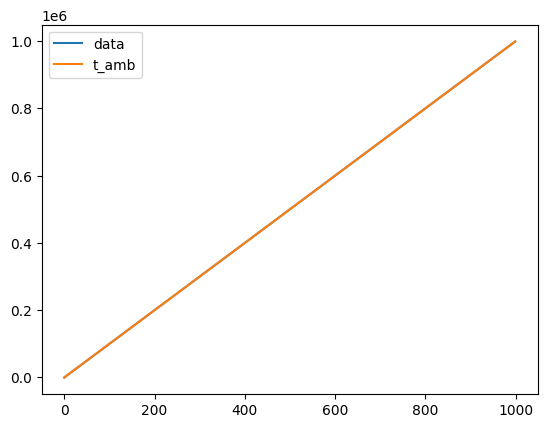

In [86]:
signal_len = 1000 #len(df_data)

plt.plot(range(0, signal_len), df_data['DWell Time(ms)'][:signal_len], label='data')
plt.plot(range(0, signal_len), df_t_amb['DWell Time(ms)'][:signal_len], label='t_amb')
plt.legend()

In [87]:
dt_data = [t2 - t1 for t2,t1 in zip(df_data['DWell Time(ms)'][1:], df_data['DWell Time(ms)'])]

In [88]:
dt_t_amb = [t2 - t1 for t2,t1 in zip(df_t_amb['DWell Time(ms)'][1:], df_t_amb['DWell Time(ms)'])]

In [89]:
df_data[df_data.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
4259,2024/10/28 17:12:32,4241850,3.8997,0.1995,7.3553,7.3553,0.777991,0.028104,22.3035
4560,2024/10/28 17:17:32,4541850,3.8970,0.0000,0.0000,7.3553,0.000000,0.000000,22.2183


In [90]:
df_data.loc[4257:4261]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
4257,2024/10/28 17:12:31,4240010,3.8999,0.2911,7.3551,7.3551,1.135234,0.028103,22.2123
4258,2024/10/28 17:12:32,4241010,3.8998,0.2723,7.3552,7.3552,1.061819,0.028104,22.2678
4259,2024/10/28 17:12:32,4241850,3.8997,0.1995,7.3553,7.3553,0.777991,0.028104,22.3035
4260,2024/10/28 17:12:33,4241860,3.8988,0.0000,0.0000,7.3553,0.000000,0.000000,22.3035
4261,2024/10/28 17:12:34,4242860,3.8988,0.0000,0.0000,7.3553,0.000000,0.000000,22.2447


In [91]:
df_data.loc[4558:4563]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
4558,2024/10/28 17:17:31,4539860,3.8972,0.0000,0.0,7.3553,0.000000,0.000000e+00,22.2582
4559,2024/10/28 17:17:32,4540860,3.8971,0.0000,0.0,7.3553,0.000000,0.000000e+00,22.2009
4560,2024/10/28 17:17:32,4541850,3.8970,0.0000,0.0,7.3553,0.000000,0.000000e+00,22.2183
4561,2024/10/28 17:17:33,4541860,3.8969,0.0272,0.0,7.3553,0.106013,0.000000e+00,22.2076
4562,2024/10/28 17:17:34,4542860,3.8970,0.0249,0.0,7.3553,0.097182,0.000000e+00,22.1582
4563,2024/10/28 17:17:35,4543860,3.8976,0.0159,0.0,7.3553,0.061853,1.000000e-07,22.2501


In [92]:
# Rimuovo indici con DWell Time sfalsato
df_data = df_data.drop(index=[idx for idx in df_data[df_data.duplicated(['TEST TIME'])].index], axis=0)

In [93]:
dt_data = [t2 - t1 for t2,t1 in zip(df_data['DWell Time(ms)'][1:], df_data['DWell Time(ms)'])]

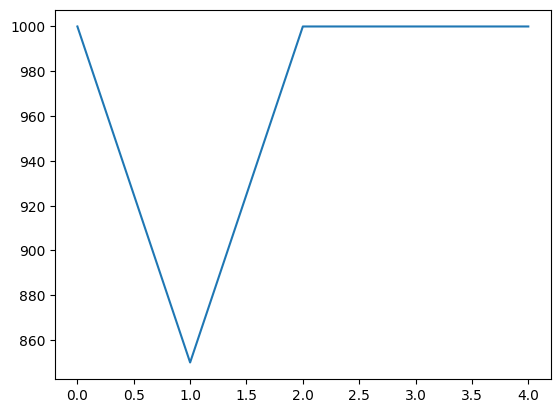

In [94]:
plt.plot(dt_data[4240:4245])

In [95]:
df_data[4240:4245]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
4257,2024/10/28 17:12:31,4240010,3.8999,0.2911,7.3551,7.3551,1.135234,0.028103,22.2123
4258,2024/10/28 17:12:32,4241010,3.8998,0.2723,7.3552,7.3552,1.061819,0.028104,22.2678
4260,2024/10/28 17:12:33,4241860,3.8988,0.0000,0.0000,7.3553,0.000000,0.000000,22.3035
4261,2024/10/28 17:12:34,4242860,3.8988,0.0000,0.0000,7.3553,0.000000,0.000000,22.2447
4262,2024/10/28 17:12:35,4243860,3.8987,0.0000,0.0000,7.3553,0.000000,0.000000,22.2945


In [96]:
df_t_amb[df_t_amb.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),T6a
149302,2024/10/30 09:30:12,149301140,20.795


In [97]:
df_t_amb[df_t_amb['TEST TIME'] == df_data['TEST TIME'].iloc[-1]]

,TEST TIME,DWell Time(ms),T6a
90478,2024/10/29 17:09:49,90478010,21.3947


In [98]:
df_t_amb.iloc[149300:149305]

,TEST TIME,DWell Time(ms),T6a
149300,2024/10/30 09:30:11,149300010,20.8517
149301,2024/10/30 09:30:12,149301010,20.7950
149302,2024/10/30 09:30:12,149301140,20.7950


In [104]:
df_t_amb_fixed = df_t_amb[:90479]

In [105]:
df_t_amb_fixed

,TEST TIME,DWell Time(ms),T6a
0,2024/10/28 16:01:51,10,21.3768
1,2024/10/28 16:01:52,1010,21.3631
2,2024/10/28 16:01:53,2010,21.3664
3,2024/10/28 16:01:54,3010,21.2692
4,2024/10/28 16:01:55,4010,21.3226
...,...,...,...
90474,2024/10/29 17:09:45,90474010,21.3257
90475,2024/10/29 17:09:46,90475010,21.3367
90476,2024/10/29 17:09:47,90476010,21.3182
90477,2024/10/29 17:09:48,90477010,21.3192


In [106]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
17,2024/10/28 16:01:51,10,3.7150,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097
18,2024/10/28 16:01:52,1010,3.7155,10.0161,0.0501,0.0501,37.214712,0.000186,21.2296
19,2024/10/28 16:01:53,2010,3.7161,10.0220,0.0529,0.0529,37.242262,0.000196,21.1824
20,2024/10/28 16:01:54,3010,3.7165,10.0172,0.0557,0.0557,37.228419,0.000207,21.1700
21,2024/10/28 16:01:55,4010,3.7170,10.0165,0.0585,0.0585,37.231728,0.000217,21.2103
...,...,...,...,...,...,...,...,...,...
90493,2024/10/29 17:09:45,90473860,3.9943,0.3129,2.1019,9.4572,1.249620,0.008336,21.6960
90494,2024/10/29 17:09:46,90474860,3.9943,0.3038,2.1020,9.4573,1.213399,0.008337,21.6748
90495,2024/10/29 17:09:47,90475860,3.9940,0.3242,2.1021,9.4574,1.294813,0.008337,21.6812
90496,2024/10/29 17:09:48,90476860,3.9940,0.3151,2.1022,9.4575,1.258595,0.008337,21.6546


In [107]:
df_res = df_data.merge(df_t_amb_fixed, on='TEST TIME')

In [108]:
df_res = df_res.rename(columns={'T2a': 'Temp(degC)', 'T6a': 'T_amb', 'TEST TIME':'Time'})

In [109]:
df_res

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temp(degC),DWell Time(ms)_y,T_amb
0,2024/10/28 16:01:51,10,3.7150,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097,10,21.3768
1,2024/10/28 16:01:52,1010,3.7155,10.0161,0.0501,0.0501,37.214712,0.000186,21.2296,1010,21.3631
2,2024/10/28 16:01:53,2010,3.7161,10.0220,0.0529,0.0529,37.242262,0.000196,21.1824,2010,21.3664
3,2024/10/28 16:01:54,3010,3.7165,10.0172,0.0557,0.0557,37.228419,0.000207,21.1700,3010,21.2692
4,2024/10/28 16:01:55,4010,3.7170,10.0165,0.0585,0.0585,37.231728,0.000217,21.2103,4010,21.3226
...,...,...,...,...,...,...,...,...,...,...,...
90474,2024/10/29 17:09:45,90473860,3.9943,0.3129,2.1019,9.4572,1.249620,0.008336,21.6960,90474010,21.3257
90475,2024/10/29 17:09:46,90474860,3.9943,0.3038,2.1020,9.4573,1.213399,0.008337,21.6748,90475010,21.3367
90476,2024/10/29 17:09:47,90475860,3.9940,0.3242,2.1021,9.4574,1.294813,0.008337,21.6812,90476010,21.3182
90477,2024/10/29 17:09:48,90476860,3.9940,0.3151,2.1022,9.4575,1.258595,0.008337,21.6546,90477010,21.3192


In [117]:
df_res.to_csv("../../data/ground/paper_dic24/test_facility.csv", index=False)

<Axes: >

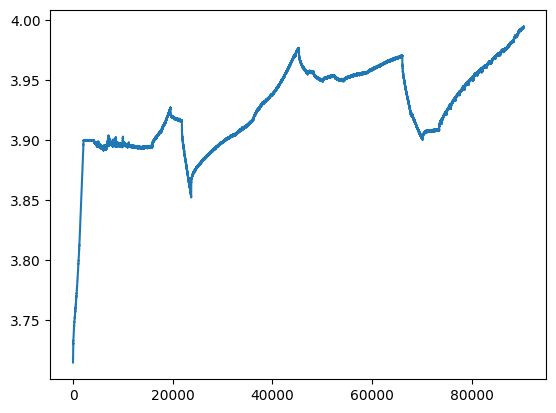

In [118]:
df_res['Voltage(V)'].plot()

In [119]:
max(df_res['Voltage(V)'])

3.9948

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/ground/paper_dic24/test_facility.csv")

In [3]:
df['T_amb'] += 0.25

In [4]:
df

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temp(degC),DWell Time(ms)_y,T_amb
0,2024/10/28 16:01:51,10,3.7150,10.0152,0.0473,0.0473,37.206279,0.000176,21.2097,10,21.6268
1,2024/10/28 16:01:52,1010,3.7155,10.0161,0.0501,0.0501,37.214712,0.000186,21.2296,1010,21.6131
2,2024/10/28 16:01:53,2010,3.7161,10.0220,0.0529,0.0529,37.242262,0.000196,21.1824,2010,21.6164
3,2024/10/28 16:01:54,3010,3.7165,10.0172,0.0557,0.0557,37.228419,0.000207,21.1700,3010,21.5192
4,2024/10/28 16:01:55,4010,3.7170,10.0165,0.0585,0.0585,37.231728,0.000217,21.2103,4010,21.5726
...,...,...,...,...,...,...,...,...,...,...,...
90474,2024/10/29 17:09:45,90473860,3.9943,0.3129,2.1019,9.4572,1.249620,0.008336,21.6960,90474010,21.5757
90475,2024/10/29 17:09:46,90474860,3.9943,0.3038,2.1020,9.4573,1.213399,0.008337,21.6748,90475010,21.5867
90476,2024/10/29 17:09:47,90475860,3.9940,0.3242,2.1021,9.4574,1.294813,0.008337,21.6812,90476010,21.5682
90477,2024/10/29 17:09:48,90476860,3.9940,0.3151,2.1022,9.4575,1.258595,0.008337,21.6546,90477010,21.5692


In [ ]:
df.to_csv("../../data/ground/paper_dic24/prova_normale_with_Tamb_offset.csv", index=False)